In [3]:

pip install -U emcee

Requirement already up-to-date: emcee in c:\users\bansa\anaconda3\lib\site-packages (3.1.2)Note: you may need to restart the kernel to use updated packages.



In [36]:
pip install corner

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
from scipy import integrate as integrate
import pandas as pd
from scipy.optimize import minimize
from scipy.special import erf
from matplotlib import cm

In [44]:
from getdist import plots, MCSamples
import getdist

In [45]:
plt.style.use('default')
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

In [46]:
def E( parameters,z):   #Flat lambdaCDM universe
    omega=parameters[0]
    omega_x=parameters[1]
    omega_lambda=1-omega
    return ((omega*((1+z)**3)) + omega_lambda*((1+z)**(3+3*omega_x)))**(1/2)

In [47]:
def erf_new(x):
    return ((4/np.pi)**(1/2))*(erf(x)-erf(0))

In [48]:
def alpha(parameters,sigma_Ho,sigma,z):
    #sigma,z,H_obs are vectors

    n = len(sigma)
    alpha0=1/(sigma_Ho)**2
    for i in range(n):
        alpha0 = alpha0 + (E(parameters,z[i])/sigma[i])**2
        
    return alpha0

In [49]:
def beta(parameters,Ho,sigma_Ho,H_obs,sigma,z):
    n = len(sigma)
    beta0=Ho/((sigma_Ho)**2)
    for i in range(n):
        beta0 = beta0 + (E(parameters,z[i])*H_obs[i]/((sigma[i])**2))
        
    return beta0
    

In [50]:
def gamma(Ho,sigma_Ho,H_obs,sigma):
    n = len(sigma)
    gamma0=(Ho/(sigma_Ho))**2
    for i in range(n):
        gamma0 = gamma0 + (H_obs[i]/sigma[i])**2
        
    return gamma0 

In [51]:
def Likelihood(parameters,Ho,sigma_Ho,H_obs,sigma,z):
    alpha0= alpha(parameters,sigma_Ho,sigma,z)
    beta0= beta(parameters,Ho,sigma_Ho,H_obs,sigma,z)
    gamma0= gamma(Ho,sigma_Ho,H_obs,sigma)
    LH1= (1/(4*alpha0*((sigma_Ho)**2)))**(1/2)
    LH2= np.exp(-gamma0/2+(((beta0)**2)/(2*alpha0)))
    LH3 = 1+ erf_new(beta0/((2*alpha0)**(1/2)))
    return (LH1*LH2*LH3)

In [52]:
def Chi_sq(parameters,Ho,sigma_Ho,H_obs,sigma,z):
    return (-2*np.log(Likelihood(parameters,Ho,sigma_Ho,H_obs,sigma,z)))

In [53]:
def log_likelihood(parameters,Ho,sigma_Ho,H_obs,sigma,z):
    return np.log(Likelihood(parameters,Ho,sigma_Ho,H_obs,sigma,z))

In [54]:
def log_prior(parameters):
    omega,omega_x = parameters
    if 0 < omega < 2.0 and -3.0 < omega_x < 3.0 :
        return 0.0
    return -np.inf

In [55]:
def log_probability(parameters,Ho,sigma_Ho,H_obs,sigma,z):
    lp = log_prior(parameters)
    if not np.isfinite(lp):
        return -np.inf
   
    return lp + log_likelihood(parameters,Ho,sigma_Ho,H_obs,sigma,z)

In [56]:
Data = pd.read_csv("Hdata - Table 1.csv")
print(Data)

    Unnamed: 0      z      H  Sigma
0          NaN  0.070   69.0   19.6
1          NaN  0.100   69.0   12.0
2          NaN  0.120   68.6   26.2
3          NaN  0.170   83.0    8.0
4          NaN  0.179   75.0    4.0
5          NaN  0.199   75.0    5.0
6          NaN  0.200   72.9   29.6
7          NaN  0.270   77.0   14.0
8          NaN  0.280   88.8   36.6
9          NaN  0.350   76.3    5.6
10         NaN  0.352   83.0   14.0
11         NaN  0.400   95.0   17.0
12         NaN  0.440   82.6    7.8
13         NaN  0.480   97.0   62.0
14         NaN  0.593  104.0   13.0
15         NaN  0.600   87.9    6.1
16         NaN  0.680   92.0    8.0
17         NaN  0.730   97.3    7.0
18         NaN  0.781  105.0   12.0
19         NaN  0.875  125.0   17.0
20         NaN  0.880   90.0   40.0
21         NaN  0.900  117.0   23.0
22         NaN  1.037  154.0   20.0
23         NaN  1.300  168.0   17.0
24         NaN  1.430  177.0   18.0
25         NaN  1.530  140.0   14.0
26         NaN  1.750  202.0

In [57]:
Data = Data.to_numpy()

In [58]:
z = Data[:,1]
H_obs = Data[:,2]
sigma = Data[:,3]
print(z)

[0.07  0.1   0.12  0.17  0.179 0.199 0.2   0.27  0.28  0.35  0.352 0.4
 0.44  0.48  0.593 0.6   0.68  0.73  0.781 0.875 0.88  0.9   1.037 1.3
 1.43  1.53  1.75  2.3  ]


In [59]:
print(np.exp(-3.085))

0.04573003390021825


In [60]:
Ho= 68
sigma_Ho=2.8

In [127]:
best_fit_params1 = minimize (Chi_sq,x0=[0,0],args=(68,2.8,H_obs,sigma,z),bounds=[(0,2),(-2,2)])
print(best_fit_params1)
print(np.round((best_fit_params1.x),2))
print(np.round((best_fit_params1.fun),2))

      fun: 18.02346040165496
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([1.13331566e-04, 2.91322523e-05])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 63
      nit: 14
     njev: 21
   status: 0
  success: True
        x: array([ 0.2898601 , -1.04672053])
[ 0.29 -1.05]
18.02


In [38]:
print(Chi_sq((0.26,-1.30),73.8,2.4,H_obs,sigma,z))

17.964199386997205


In [62]:
import emcee

pos = best_fit_params1.x + 1e-4 * np.random.randn(200, 2)
nwalkers, ndim = pos.shape

filename = "Ho68_XCDM.h5"
backend = emcee.backends.HDFBackend(filename)
backend.reset(nwalkers, ndim)

sampler = emcee.EnsembleSampler(
    nwalkers, ndim, log_probability, args=(68,2.8,H_obs,sigma,z),backend=backend
)

sampler.run_mcmc(pos, 10000, progress=True);

 55%|██████████████████████████████████████████▎                                  | 5491/10000 [07:27<05:46, 13.03it/s]<ipython-input-53-fcfda0702a1a>:2: RuntimeWarning: divide by zero encountered in log
  return np.log(Likelihood(parameters,Ho,sigma_Ho,H_obs,sigma,z))
100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [13:26<00:00, 12.40it/s]


In [50]:
max_n = 100000

# We'll track how the average autocorrelation time estimate changes
index = 0
autocorr = np.empty(max_n)

# This will be useful to testing convergence
old_tau = np.inf

# Now we'll sample for up to max_n steps
for sample in sampler.sample(pos, iterations=max_n, progress=True):
    # Only check convergence every 100 steps
    if sampler.iteration % 100:
        continue

    # Compute the autocorrelation time so far
    # Using tol=0 means that we'll always get an estimate even
    # if it isn't trustworthy
    tau = sampler.get_autocorr_time(tol=0)
    autocorr[index] = np.mean(tau)
    index += 1

    # Check convergence
    converged = np.all(tau * 100 < sampler.iteration)
    converged &= np.all(np.abs(old_tau - tau) / tau < 0.01)
    if converged:
        break
    old_tau = tau

  3%|██▎                                                                         | 3100/100000 [01:17<40:23, 39.98it/s]


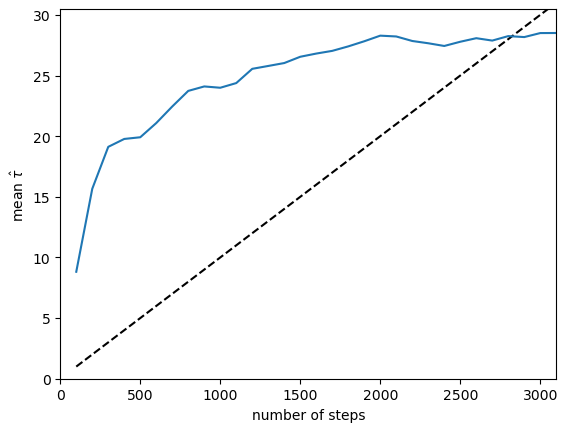

In [51]:
import matplotlib.pyplot as plt

n = 100 * np.arange(1, index + 1)
y = autocorr[:index]
plt.plot(n, n / 100.0, "--k")
plt.plot(n, y)
plt.xlim(0, n.max())
plt.ylim(0, y.max() + 0.1 * (y.max() - y.min()))
plt.xlabel("number of steps")
plt.ylabel(r"mean $\hat{\tau}$");

In [63]:
tau = sampler.get_autocorr_time()
tau = sampler.get_autocorr_time()
burnin = int(2 * np.max(tau))
thin = int(0.5 * np.min(tau))
flat_samples = sampler.get_chain(discard=burnin, thin=thin, flat=True)
print("burn-in: {0}".format(burnin))
print("thin: {0}".format(thin))
print("flat chain shape: {0}".format(flat_samples.shape))

burn-in: 63
thin: 15
flat chain shape: (132400, 2)


In [64]:
samps = flat_samples
names = ["omega","omega_lambda"]
labels =  ["\Omega","\Omega_{\Lambda}"]
samples = MCSamples(samples=samps,names = names, labels = labels)

Removed no burn in


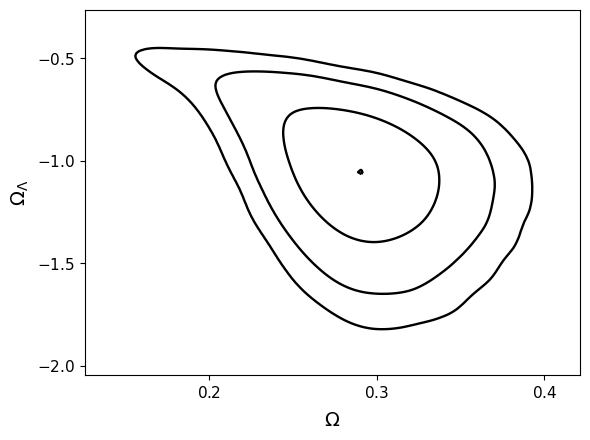

In [65]:
g = plots.get_single_plotter()
samples.updateSettings({'contours': [0.001,0.68, 0.95, 0.99]})
g.settings.num_plot_contours = 4
g.plot_2d(samples, 'omega', 'omega_lambda');

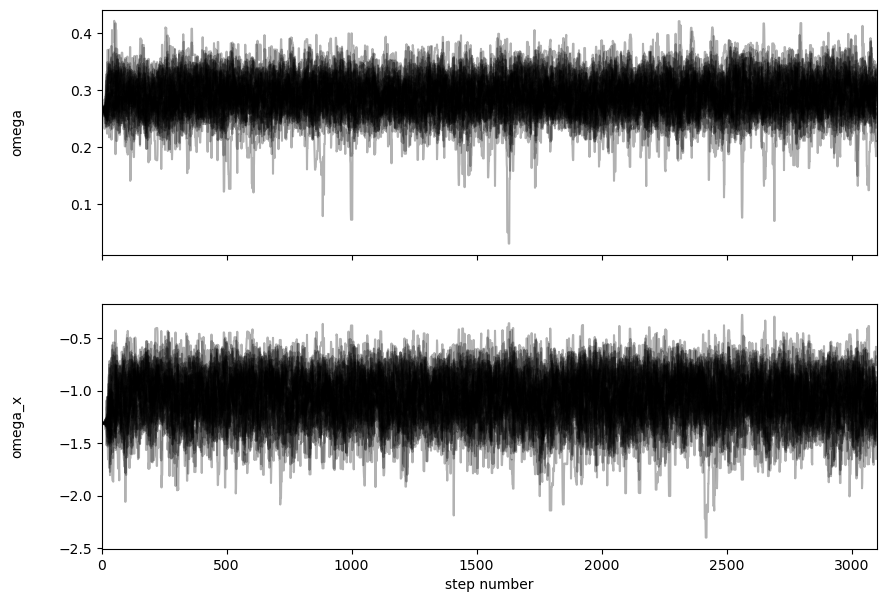

In [58]:
fig, axes = plt.subplots(2, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["omega", "omega_x"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1,0.5)

axes[-1].set_xlabel("step number");

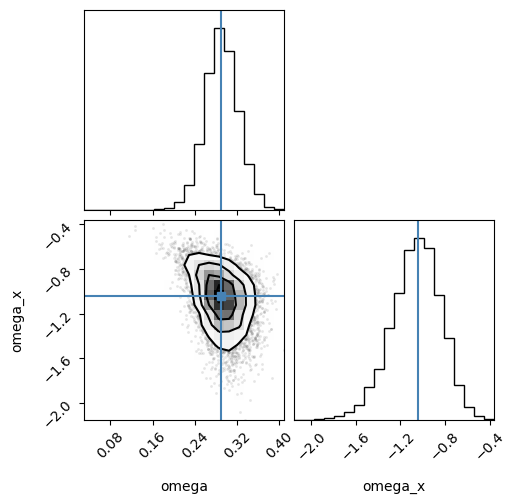

In [59]:
import corner

fig = corner.corner(
    flat_samples, labels=labels, truths=[0.2898601 , -1.04672053]
);

In [126]:
best_fit_params2 = minimize (Chi_sq,x0=[0,0],args=(73.8,2.4,H_obs,sigma,z),bounds=[(0,2),(-2,2)])
print(best_fit_params2)
print(np.round((best_fit_params2.x),2))
print(np.round((best_fit_params2.fun),2))

      fun: 17.923942936072176
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.00101323, 0.000135  ])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 48
      nit: 13
     njev: 16
   status: 0
  success: True
        x: array([ 0.26460276, -1.30981508])
[ 0.26 -1.31]
17.92


In [67]:
import emcee

pos = best_fit_params2.x + 1e-4 * np.random.randn(200, 2)
nwalkers, ndim = pos.shape

filename = "Ho73.8_XCDM.h5"
backend = emcee.backends.HDFBackend(filename)
backend.reset(nwalkers, ndim)

sampler = emcee.EnsembleSampler(
    nwalkers, ndim, log_probability, args=(73.8,2.4,H_obs,sigma,z),backend=backend
)

sampler.run_mcmc(pos, 10000, progress=True);

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [13:26<00:00, 12.40it/s]


In [62]:
max_n = 100000

# We'll track how the average autocorrelation time estimate changes
index = 0
autocorr = np.empty(max_n)

# This will be useful to testing convergence
old_tau = np.inf

# Now we'll sample for up to max_n steps
for sample in sampler.sample(pos, iterations=max_n, progress=True):
    # Only check convergence every 100 steps
    if sampler.iteration % 100:
        continue

    # Compute the autocorrelation time so far
    # Using tol=0 means that we'll always get an estimate even
    # if it isn't trustworthy
    tau = sampler.get_autocorr_time(tol=0)
    autocorr[index] = np.mean(tau)
    index += 1

    # Check convergence
    converged = np.all(tau * 100 < sampler.iteration)
    converged &= np.all(np.abs(old_tau - tau) / tau < 0.01)
    if converged:
        break
    old_tau = tau

  3%|██▍                                                                         | 3200/100000 [01:20<40:23, 39.95it/s]


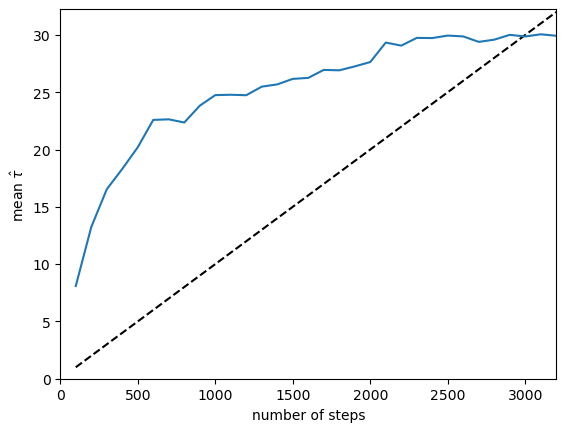

In [63]:
import matplotlib.pyplot as plt

n = 100 * np.arange(1, index + 1)
y = autocorr[:index]
plt.plot(n, n / 100.0, "--k")
plt.plot(n, y)
plt.xlim(0, n.max())
plt.ylim(0, y.max() + 0.1 * (y.max() - y.min()))
plt.xlabel("number of steps")
plt.ylabel(r"mean $\hat{\tau}$");

In [68]:
tau = sampler.get_autocorr_time()
tau = sampler.get_autocorr_time()
burnin = int(2 * np.max(tau))
thin = int(0.5 * np.min(tau))
flat_samples2 = sampler.get_chain(discard=burnin, thin=thin, flat=True)
print("burn-in: {0}".format(burnin))
print("thin: {0}".format(thin))
print("flat chain shape: {0}".format(flat_samples.shape))

burn-in: 62
thin: 15
flat chain shape: (132400, 2)


In [69]:
samps2 = flat_samples2
names = ["omega","omega_lambda"]
labels =  ["\Omega_{mo}","\omega_{x}"]
samples2 = MCSamples(samples=samps2,names = names, labels = labels)

Removed no burn in


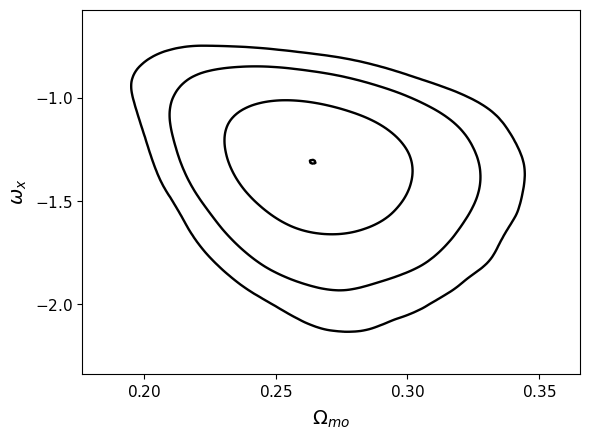

In [70]:
g = plots.get_single_plotter()
samples2.updateSettings({'contours': [0.001,0.68, 0.95, 0.99]})
g.settings.num_plot_contours = 4
g.plot_2d(samples2, 'omega', 'omega_lambda');

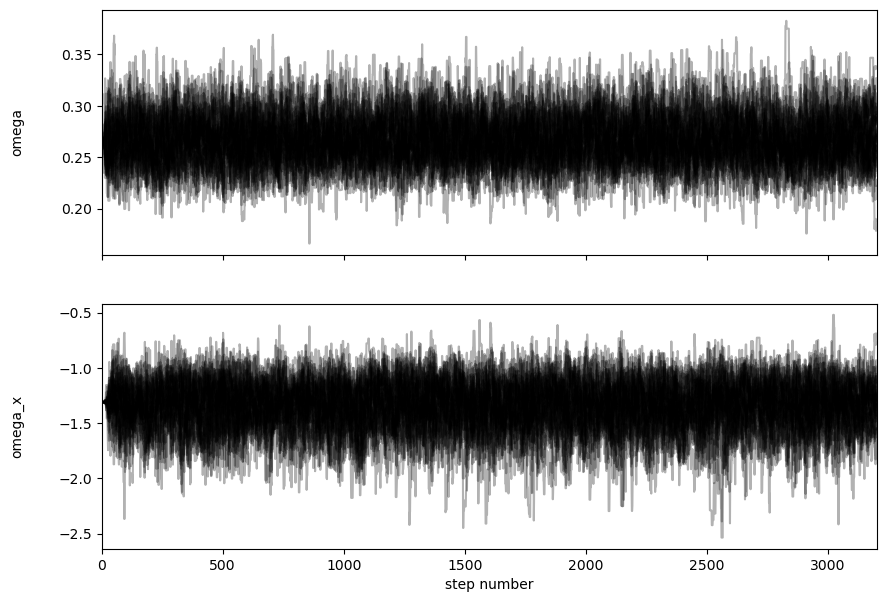

In [69]:
fig, axes = plt.subplots(2, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["omega", "omega_x"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1,0.5)

axes[-1].set_xlabel("step number");

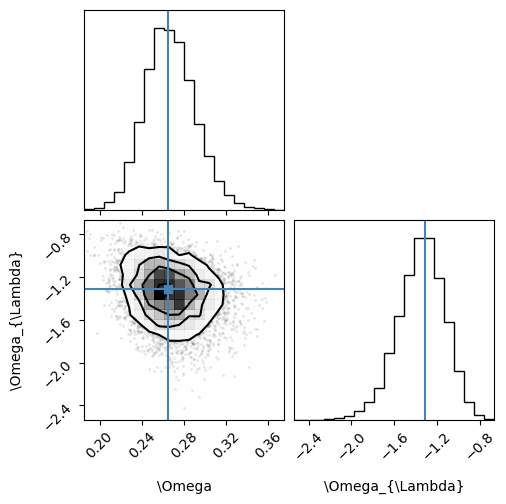

In [88]:
import corner

fig = corner.corner(
    flat_samples2, labels=labels, truths=[0.26460276, -1.30981508]
);

<ipython-input-72-a272a678995f>:20: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax1.text(0.4,-0.65,"Deceleration",Rotation="-15",weight="bold")
<ipython-input-72-a272a678995f>:21: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax1.text(0.4,-0.78,"Acceleration",Rotation="-15",weight="bold")


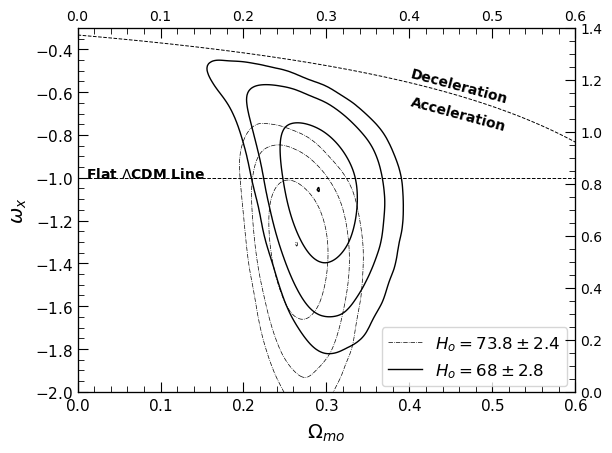

In [72]:
g = plots.get_single_plotter()
samples2.updateSettings({'contours': [0.001,0.68, 0.95, 0.99]})
samples.updateSettings({'contours': [0.001,0.68, 0.95, 0.99]})
g.settings.num_plot_contours = 4
g.plot_2d([samples2,samples], 'omega', 'omega_lambda',lws=[0.5,1],filled=[False,False],colors=["Black","Black"],ls=["dashdot","solid"]);
#g.plot_2d([samples2], 'omega', 'omega_lambda',lws=[1],filled=[False],colors=["Black"],ls=["solid"]);

ax1= g.get_axes()
g.add_legend(['$H_o=73.8 \pm 2.4$', '$H_o=68 \pm 2.8$'], bbox_to_anchor=(1.0,0.2));
ax1.set_ylim(-2,-0.3)
ax1.set_xlim(0,0.6)
ax1.xaxis.set_major_locator(MultipleLocator(0.1))
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_major_locator(MultipleLocator(0.2))
ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax1.tick_params(which ='both',direction='in')
ax1.tick_params(which='major', length=7)
ax1.tick_params(which='minor', length=4)
ax1.text(0.01,-1.0,"Flat ${\Lambda}$CDM Line",weight="bold")
ax1.text(0.4,-0.65,"Deceleration",Rotation="-15",weight="bold")
ax1.text(0.4,-0.78,"Acceleration",Rotation="-15",weight="bold")

flat_lambda_CDM = ax1.plot(xlist,(xlist*0-1),c="black",ls="--",lw=0.7)
acceleration_line=ax1.plot(xlist,(1/(3*xlist-3)),c="black",ls="--",lw=0.7)

ax2 = ax1.twinx()
ax2.tick_params(direction='in')
ax2.set_ylim(0,1.4)
ax3= ax1.twiny()
ax3.tick_params(direction='in')
ax3.set_xlim(0,0.6)
ax3.xaxis.set_major_locator(MultipleLocator(0.1))
ax3.xaxis.set_minor_locator(AutoMinorLocator())
ax2.yaxis.set_major_locator(MultipleLocator(0.2))
ax2.yaxis.set_minor_locator(AutoMinorLocator())
ax2.tick_params(which ='both',direction='in')
ax2.tick_params(which='major', length=7)
ax2.tick_params(which='minor', length=4)
ax3.tick_params(which ='both',direction='in')
ax3.tick_params(which='major', length=7)
ax3.tick_params(which='minor', length=4)





In [83]:
from IPython.display import display, Math

for i in range(2):
    mcmc = np.percentile(flat_samples[:, i], [2.28, 50, 97.7])
    q = np.diff(mcmc)
    minimum = mcmc[1]-q[0]
    maximum = mcmc[1]+q[1]
    #print(f"{minimum} $\le \Omega \ge$ {maximum}")
    txt = "\mathrm{{{3}}} = {0:.2f}_{{{1:.2f}}}^{{{2:.2f}}}"
    txt = txt.format(mcmc[1], mcmc[1]-q[0], mcmc[1]+q[1], labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [84]:
from IPython.display import display, Math

for i in range(2):
    mcmc = np.percentile(flat_samples2[:, i], [2.28, 50, 97.7])
    q = np.diff(mcmc)
    minimum = mcmc[1]-q[0]
    maximum = mcmc[1]+q[1]
    #print(f"{minimum} $\le \Omega \ge$ {maximum}")
    txt = "\mathrm{{{3}}} = {0:.2f}_{{{1:.2f}}}^{{{2:.2f}}}"
    txt = txt.format(mcmc[1], mcmc[1]-q[0], mcmc[1]+q[1], labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [125]:
from scipy.optimize import fsolve
import math


def func(x,best_fit_params):
    omega_da,omega_x_da=best_fit_params
    return (omega_da+((1-omega_da)*(1+3*omega_x_da)*((1+x)**(3*omega_x_da))))

x1 = scipy.optimize.fsolve(func,0.7,args=(best_fit_params1.x))
x2 = scipy.optimize.fsolve(func,0.7,args=(best_fit_params2.x))
print (np.round(x1,3),np.round(x2,3))

[0.695] [0.705]


In [71]:
xlist = np.linspace(0, 0.60, 1000)
ylist = np.linspace(-2,-0.3, 1000)
parameters = np.meshgrid(xlist, ylist)
X=parameters[0]
Y=parameters[1]

In [24]:
Z = Chi_sq(parameters,68,2.8,H_obs,sigma,z)
Z2 =  Chi_sq(parameters,73.8,2.4,H_obs,sigma,z)

In [25]:
print(Z)

[[1302.78438195 1259.68280513 1224.51713643 ...   79.96282755
    80.09789173   80.23296121]
 [1301.6230465  1258.63334602 1223.53410668 ...   79.94444646
    80.07954031   80.21463946]
 [1300.46073457 1257.58278039 1222.5500148  ...   79.92606283
    80.06118634   80.19631516]
 ...
 [  32.58774913   32.57899308   32.5705755  ...   99.74425693
    99.83979619   99.93534393]
 [  32.61306327   32.60594301   32.59915384 ...   99.94258634
   100.03782765  100.13307733]
 [  32.64599333   32.64048259   32.63529568 ...  100.14212792
   100.23706951  100.33201934]]


<ipython-input-48-4a98ad8a4c23>:43: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax1.text(0.4,-0.65,"Deceleration",Rotation="-15",weight="bold")
<ipython-input-48-4a98ad8a4c23>:44: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax1.text(0.4,-0.78,"Acceleration",Rotation="-15",weight="bold")


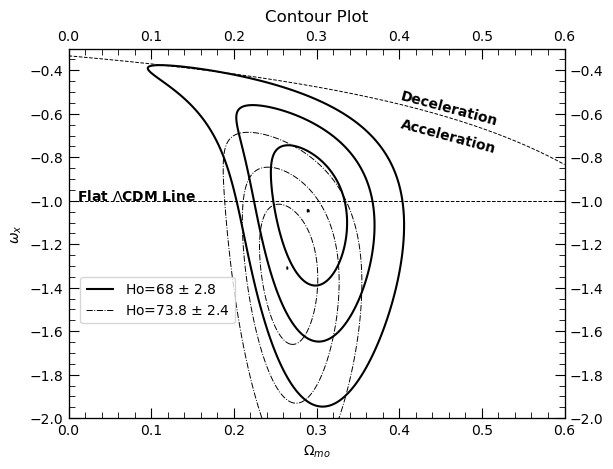

In [48]:
fig, ax1 = plt.subplots()

#drawing contour plot

cb = ax1.contour(X, Y, Z2,levels=[17.925,20.22,24.09,29.72],colors="black",linewidths=0.7,linestyles="dashdot")
cb2 = ax1.contour(X, Y, Z,levels=[18.024,20.323,24.193,29.823],colors="black")
flat_lambda_CDM = ax1.plot(xlist,(xlist*0-1),c="black",ls="--",lw=0.7)
acceleration_line=ax1.plot(xlist,(1/(3*xlist-3)),c="black",ls="--",lw=0.7)
#omega_lambda_nobigbang= 4*xlist*((np.cosh(np.arccosh((1-xlist)/(xlist))/3))**3)
#nobigbang= ax1.plot(xlist,omega_lambda_nobigbang,c="black",lw=0.5)
#Adding a colorbar to the plot
#fig.colorbar(cb) 

ax2 = ax1.twinx()
ax2.tick_params(direction='in')
ax2.set_ylim(-2,-0.3)
ax3= ax1.twiny()
ax3.tick_params(direction='in')
ax3.set_xlim(0,0.6)
ax3.xaxis.set_major_locator(MultipleLocator(0.1))
ax3.xaxis.set_minor_locator(AutoMinorLocator())
ax2.yaxis.set_major_locator(MultipleLocator(0.2))
ax2.yaxis.set_minor_locator(AutoMinorLocator())
ax2.tick_params(which ='both',direction='in')
ax2.tick_params(which='major', length=7)
ax2.tick_params(which='minor', length=4)
ax3.tick_params(which ='both',direction='in')
ax3.tick_params(which='major', length=7)
ax3.tick_params(which='minor', length=4)
        
ax1.set_title('Contour Plot')
ax1.set_xlabel('$\Omega_{mo}$')
ax1.set_ylabel('$\omega_{x}$')
ax1.set_ylim(-2,-0.3)
ax1.xaxis.set_major_locator(MultipleLocator(0.1))
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_major_locator(MultipleLocator(0.2))
ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax1.tick_params(which ='both',direction='in')
ax1.tick_params(which='major', length=7)
ax1.tick_params(which='minor', length=4)
ax1.text(0.01,-1.0,"Flat ${\Lambda}$CDM Line",weight="bold")
ax1.text(0.4,-0.65,"Deceleration",Rotation="-15",weight="bold")
ax1.text(0.4,-0.78,"Acceleration",Rotation="-15",weight="bold")

#ax2.plot("--")

lines = [ cb2.collections[0],cb.collections[0]]
labels = ['Ho=68 $\pm$ 2.8','Ho=73.8 $\pm$ 2.4']
#ax.legend(["1","2"],loc=4,bbox_to_anchor=(1.1, 0.0))
#Ho=68 $\pm$ 2.8
#Ho=73.8 $\pm$ 2.4
plt.legend(lines, labels,bbox_to_anchor=(0.35, 0.4))
plt.show()

In [42]:
import emcee
reader = emcee.backends.HDFBackend("Ho68_XCDM.h5")
tau = reader.get_autocorr_time()
burnin = int(2 * np.max(tau))
thin = int(0.5 * np.min(tau))
samples = reader.get_chain(discard=burnin, flat=True, thin=thin)
print("burn-in: {0}".format(burnin))
print("thin: {0}".format(thin))
print("flat chain shape: {0}".format(samples.shape))

AttributeError: You must run the sampler with 'store == True' before accessing the results